#### Урок 1. Основы обучения нейронных сетей

**Домашнее задание N1** 

**Слушатель: Перфильев Дмитрий**

Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?</li>


In [1]:
'''
Построение двухслойной нейронный сети для классификации цветков ириса
'''
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

plt.style.use('ggplot')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [2]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)


### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("data/Iris.csv")
print(iris_data.shape)
print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

(150, 6)
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


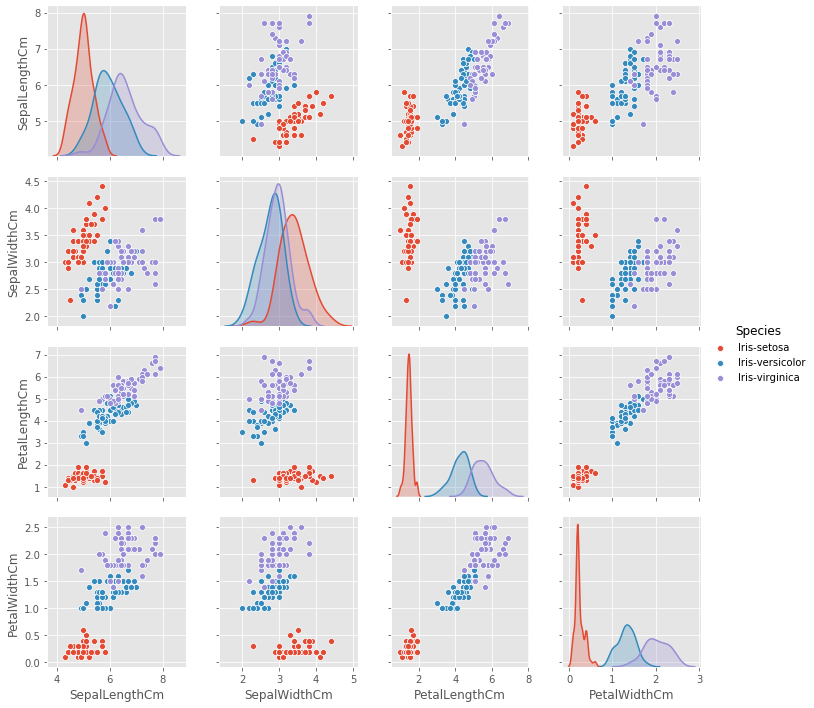

In [3]:
# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
plt.show() # расскоментируйте, чтобы посмотреть

In [4]:
# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.as_matrix())

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.as_matrix()
y = y.flatten()
y = to_one_hot(y)

In [5]:
w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

print(f'{w0}')
print(f'{w1}')

[[ 0.99373583  0.12470748 -0.63083771 -0.90001148 -0.70580234]
 [-0.20181354  0.0065726   0.23424127  0.25111581 -0.43353097]
 [ 0.97985072  0.44242498 -0.37382483  0.98325303  0.03221225]
 [-0.6299053  -0.11244367  0.26341651  0.41835049  0.47194707]]
[[ 0.53171794  0.78059228  0.46342941]
 [ 0.91640851  0.06706784 -0.87009455]
 [ 0.35617877  0.28325979 -0.69341727]
 [ 0.32105372 -0.56375057  0.3608569 ]
 [-0.11210298 -0.32403394 -0.83371424]]


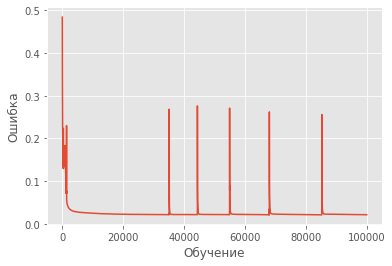


++++++++++++++++++++++++++++++++++++++++++

random_state : 886

Точность нейронной сети 97.9%

Максимльная точность нейронной сети наблюдается в случае:

Количество итераций обычения : 85186

Точность нейронной сети : 97.92%


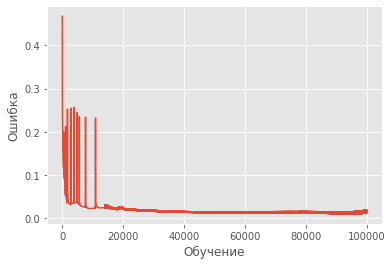


++++++++++++++++++++++++++++++++++++++++++

random_state : 77

Точность нейронной сети 98.1%

Максимльная точность нейронной сети наблюдается в случае:

Количество итераций обычения : 93100

Точность нейронной сети : 98.97%


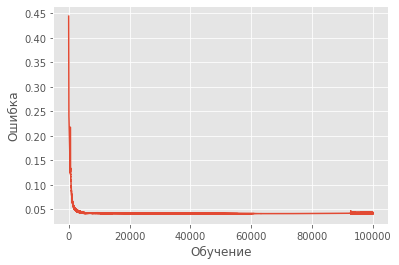


++++++++++++++++++++++++++++++++++++++++++

random_state : 100

Точность нейронной сети 95.7%

Максимльная точность нейронной сети наблюдается в случае:

Количество итераций обычения : 99962

Точность нейронной сети : 95.97%


In [6]:
for v in range(3):
    random_state = random.randrange(1000)
    # Разделение данных на тренировочные и тестовые
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=random_state)
   
    ### Шаг 3. Обученние нейронной сети
    # присваевание случайных весов
    w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
    w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

    # скорость обучения (learning rate)
    n = 0.1

    # массив для ошибок, чтобы потом построить график
    errors = []

    max_accuracy = 1

    # процесс обучения
    for i in range(100000):

        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = y_train - layer2
        layer2_delta = layer2_error * sigmoid_deriv(layer2)

        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)

        w1 += layer1.T.dot(layer2_delta) * n
        w0 += layer0.T.dot(layer1_delta) * n

        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        accuracy = (1 - error) * 100

        if round(accuracy,2) > max_accuracy:
            iter_num = i
            max_accuracy = round(accuracy,2)

    ### Шаг 4. Демонстрация полученных результатов
    # черчение диаграммы точности в зависимости от обучения
    plt.plot(errors)
    plt.xlabel('Обучение')
    plt.ylabel('Ошибка')
    plt.show() # расскоментируйте, чтобы посмотреть
    print("\n++++++++++++++++++++++++++++++++++++++++++")
    print(f"\nrandom_state : {random_state}")
    print("\nТочность нейронной сети " + str(round(accuracy,2)) + "%")

    print("\nМаксимльная точность нейронной сети наблюдается в случае:")
    print(f"\nКоличество итераций обычения : {iter_num}")
    print(f"\nТочность нейронной сети : {max_accuracy}%")

#### Выводы 

**1. На точность предсказаний влияет разбиение выборки на тренировочную и тестову. Изменение random_state влияет на точность модели как и для таких алгоритмов как random forest, logistic и пр**

**2. На результаты также влияет количество итераций обучения**

**3. На результаты также влияет выбор алгоритма распространения обратной ошибки**